# Exploratory Data Analysis for the Dengue Serotype Classifier

The aim of this notebook is to identify Dengue serotypes from genomic sequence fragments 

This notebook is organized in the following sections:

* Data preprocessing
* Preprocessing labeled data
* Exploratory Data Analysis (ToDo)

In [36]:
import pandas as pd
import re

## Preprocessing

In order to put clean data into the classifier, we start by getting sequences and descriptions for each sequence

__Load the data__

In [37]:
datafile = open('../data/all_den_proteinE.fasta', 'r')

In [38]:
data = ''

with open('../data/all_den_proteinE.fasta', 'r') as file:
    data = file.read()

In [39]:
print(data[:10000])

>KR919614.1 Dengue virus 1 isolate GZ2014014 envelope gene, partial cds
ATAGGCAACAGAGACTTCGTTGAAGGACTGTCAGGAGCAACATGGGTGGATGTGGTACTGGAGCATGGAA
GCTGTGTCACCACCATGGCAAAGAATAAACCAACATTGGACATTGAACTCTTGAAGACGGAGGTCACGAA
CCCTGCCGTCTTGCGCAAACTGTGCATTGAAGCTAAAATATCAAACACCACCACCGATTCAAGATGTCCA
ACACAAGGAGAAGCTACACTGGTGGAAGAACAAGACGCGAACTTTGTGTGTCGACGAACATTCGTGGACA
GAGGCTGGGGTAATGGTTGTGGACTATTCGGGAAGGGAAGCTTACTAACGTGTGCTAAGTTTAAGTGTGT
GACAAAACTTGAAGGAAAGATAGTTCAATATGAAAACTTAAAATATTCGGTGATAGTCACTGTCCACACT
GGGGACCAGCACCAGGTAGGAAATGAGACTACAGAACATGGAACAATTGCAACCATAACACCTCAAGCTC
CCACGTCGGAAATACAGCTGACTGACTACGGAGCCCTTACATTGGACTGCTCACCTAGAACAGGGCTGGA
CTTTAATGAGATGGTGCTGTTGACAATGAAAGAAAAATCATGGCTTGTCCACAAACAATGGTTTCTAGAC
TTACCATTACCTTGGACCTCGGGGGCTTCAACATCTCAAGAGACTTGGAACAGACAAGATCTGCTGGTCA
CGTTTAAGACAGCTCATGCAAAGAAGCAGGAAGTAGTCGTACTGGGGTCACAAGAAGGAGCAATGCACAC
TGCGTTGACTGGGGCGACAGAAATCCAGACGTCAGGAACGACGACAATCCTCGCAGGACACCTGAAATGT
AGACTGAAAATGGATAAACTGACTTTAAAAGGGGTGTCATATGTGATGTGCACAGGCTCATTTAAGCTAG
AGAAG

As we can see, the data has a sequence description, and the sequence itself.

Now, lets extract both, descriptions and sequences, by using regular expressions.

__Extract descriptions and sequences__

In [40]:
# Extract descriptions
regex_heads = r'\>.+\n'
data_heads = re.findall(regex_heads, data)

data_heads = [d[:-1] for d in data_heads]

In [41]:
# Extract sequences
data_sequences = re.sub(regex_heads, '', data)

data_sequences = re.sub(r'\n\n', '\t', data_sequences)
data_sequences = re.sub(r'\n', '', data_sequences)
data_sequences = re.sub(r'\t', '\n', data_sequences)

regex_sequences = r'[ACTG]+\n'
data_sequences = re.findall(regex_sequences, data_sequences)
data_sequences = [d[:-1] for d in data_sequences]

We must be sure that descriptions and sequences has the same length.

In [42]:
len(data_sequences)

10125

In [43]:
len(data_heads)

10125

Now we are ready to load the data into a Pandas.DataFrame

__Load data into DataFrame__

In [44]:
df = pd.DataFrame({'description': data_heads,
             'sequence': data_sequences})

In [45]:
df.head()

,description,sequence
0,>KR919614.1 Dengue virus 1 isolate GZ2014014 e...,ATAGGCAACAGAGACTTCGTTGAAGGACTGTCAGGAGCAACATGGG...
1,>KR919613.1 Dengue virus 1 isolate GZ2014013 e...,ATAGGCAACAGAGACTTCGTGGAAGGACTGTCAGGAGCAACTTGGG...
2,>JN544408.1 Dengue virus 1 isolate SG(EHI)D1/2...,ATGCGGTGCGTGGGAATAGGCAACAGAGACTTCGTTGAAGGACTGT...
3,>JN544406.1 Dengue virus 1 isolate SG(EHI)D1/1...,ATGCGGTGCGTGGGAATAGGCAACAGAGACTTCGTTGAAGGACTGT...
4,>JN544405.1 Dengue virus 1 isolate SG(EHI)D1/2...,ATGCGGTGCGTGGGAATAGGCAACAGAGACTTCGTTGAAGGACTGT...


## Preprocessing labeled data

A second approach involves processing _fasta_ files for each serotype.

This time, we use the biopython module to import data from files with fasta format. 

In [46]:
from Bio import SeqIO
import pandas as pd

In [47]:
fasta_files = [['../data/datos_entrenamiento/D' + str(i) + '_protE_aligned.fasta', str(i)] for i in range(1,5)]

In [48]:
fasta_files

[['../data/datos_entrenamiento/D1_protE_aligned.fasta', '1'],
 ['../data/datos_entrenamiento/D2_protE_aligned.fasta', '2'],
 ['../data/datos_entrenamiento/D3_protE_aligned.fasta', '3'],
 ['../data/datos_entrenamiento/D4_protE_aligned.fasta', '4']]

In [49]:
def load_fasta_files(files= []):
    '''
    Load sequences from fasta files
    
    -----
    param:
    files list containing [path, label]
    
    -------
    returns:
    list containing [label, id, sequence]
    '''
    res = []
    for f in files:
        fasta_file = SeqIO.parse(open(f[0]), 'fasta')
        
        for s in fasta_file:
            res.append([s.id, str(s.seq), f[1]])
    
    return res

Let's load the data into a pandas.DataFrame

In [50]:
data = load_fasta_files(fasta_files)

df = pd.DataFrame(data, columns=['id', 'sequence', 'label'])

In [51]:
df.shape

(10103, 3)

In [52]:
%matplotlib inline

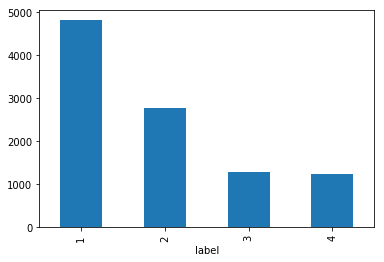

In [53]:
df.groupby('label').count()['sequence'].plot('bar')

As result, we have a pandas DataFrame containing the sequences labeled with a serotype number from 1 to 4.

Next step involves analysing sequences on each serotype (label)

### Check the data 

In [54]:
df.shape

(10103, 3)

In [55]:
df_d1 = df[df['label'] == '1']

In [56]:
df_d1.drop('label', axis=1,inplace=True)

/home/zamu/.virtualenvs/dengue/lib/python3.5/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Assert that lenghts are all the same for every sequence

In [57]:
lenghts = []

for s in df_d1['sequence']:
    lenghts.append(len(s))

In [58]:
pd.Series(lenghts).describe()

count    4805.0
mean     1898.0
std         0.0
min      1898.0
25%      1898.0
50%      1898.0
75%      1898.0
max      1898.0
dtype: float64

In [59]:
lenghts = []

for s in df['sequence']:
    lenghts.append(len(s))

In [60]:
pd.Series(lenghts).describe()

count    10103.0
mean      1898.0
std          0.0
min       1898.0
25%       1898.0
50%       1898.0
75%       1898.0
max       1898.0
dtype: float64

## Feature extraction

So, sequences are 1898 lenght. Since every nucleotide in the sequence can have 5 (five) possible values (-, A, C, T, G), we should enconde this values in a processable way. The negative (__-__) simbol means absense of data for that nucleotide.

The proposed strategy is:
1. Split the sequence in nucleotide positions
2. Encode every nucleotide position in new variables

The resulting dataset should have 9490 features (1898 nucleotides * 5 posible values). Actually we expect to be less than 9490 since there may be features with no variability.

In [61]:
df['sequence'].shape

(10103,)

First, lets define a function that help us the split task

In [115]:
def insert_separator(s, sep = ','):
    '''
    Insert the separator sep between every character in string s
    
    ------
    param: s
    string
    
    ------
    param: sep
    separetor to insert between characters (default = ',')
    
    -------
    returns
    string
    
    ------
    e.g.
    s = 'abcde'
    insert_separator(s)
    
    output: 'a,b,c,d,e'
    
    '''
    if (s.__class__ is not str):
        return s
    
    res = None   
    lenght = len(s)
    
    if lenght <= 1:
        res = s
    else:
        half = lenght // 2
        res = split_by_1(s[:half]) + sep + split_by_1(s[half:])
    return res

In [116]:
result = {}

for idx, data in df['sequence'].iteritems():
    #splitted_string = []
    #for i in data:
    #    splitted_string.append(i)
    splitted_string = insert_separator(data).split(',')
        
    result[idx] = splitted_string

In [117]:
df_sequences = pd.DataFrame.from_dict(result, orient='index')

In [118]:
assert(len(result) == df_sequences.shape[0]) #4805

In [119]:
df_sequences.shape

(10103, 1898)

In [66]:
df_sequences.head()

,0,1,2,3,4,5,6,7,8,9,...,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [67]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
enc = OneHotEncoder() #(['n', 'a', 'c', 't', 'g'])

#df_sequences_dummies = df_sequences.replace('-', 'n')
df_sequences_dummies = enc.fit_transform(df_sequences)

In [69]:
df_sequences_dummies.shape

(10103, 7439)

We can take a look at the feature names.

In [70]:
enc.get_feature_names()

array(['x0_-', 'x0_g', 'x1_-', ..., 'x1896_c', 'x1897_-', 'x1897_c'],
      dtype=object)

## Feature selection

Let's remove features with zero variance using scikit learn

In [71]:
from sklearn.feature_selection import VarianceThreshold

In [72]:
sel = VarianceThreshold()

In [73]:
sequences_reduced = sel.fit_transform(df_sequences_dummies)

In [74]:
sequences_reduced.shape

(10103, 7435)

In [75]:
sel.get_support().shape

(7439,)

By removing features with zero variability, we demonstrate that there is no significant dimensionality reduction. Only 4 of the 7439 present zero variability.